In [1]:
import os
import sys
sys.path.append('/home/ak/Documents/PaperCode/stylised_facts')
import pandas as pd
import pickle
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, laplace
import random
import seaborn as sns
import time
import tqdm

import freqopttest.kernel as kernel
import freqopttest.tst as tst
import matplotlib as mpl

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [ ]:
# !pip install --upgrade matplotlib

In [ ]:
plt.style.use(os.path.join(mpl.get_configdir(),'latexstyle3.mplstyle'))

In [ ]:
os.listdir('/home/ak/.config/matplotlib/')

In [ ]:
t7 ='/media/ak/T71'
experimentFiles = os.path.join(t7,'August11th2022Experiments')
expOne = os.path.join(experimentFiles, 'ExperimentOne')
# expTwo = os.path.join(experimentFiles, 'ExperimentTwo')
# expInputFiles = expOne = os.path.join(experimentFiles, 'ExperimentInputFiles')
LinearMMDOutputFiles = os.path.join(expOne, 'LinearMMDOutputFiles')
QuadMMDOutputFiles = os.path.join(expOne, 'QuadMMDOutputFiles')

## 
linear_mmd_files = os.listdir(LinearMMDOutputFiles)
quad_mmd_files = os.listdir(QuadMMDOutputFiles)
symbols =['FB1', 'JB1']


In [ ]:
figuresLocation = '/home/ak/Documents/Papers/StylisedFactsPaper/figures'

In [ ]:
symbol = symbols[1]
files = [f for f in linear_mmd_files if str(symbol) in f and str('tau') in f and str('shift') in f]
print(symbol)

In [ ]:
file_idx = 2
file_to_load = os.path.join(LinearMMDOutputFiles, files[file_idx])
file_to_load

In [152]:
file_dict = pd.read_pickle(file_to_load)
shifts = list(file_dict.keys())
keys = ['widths',
 'med',
 'besti',
 'powers',
 'med_on_test_data',
 'test_result',
 'test_variance',
 'two_moments',
 'compute_unbiased_linear_estimator']

###
alpha =0.01

In [153]:
idxShift = 10
widths = file_dict[shifts[idxShift]]['widths']
powers = file_dict[shifts[idxShift]]['powers']
med = file_dict[shifts[idxShift]]['med']
besti = file_dict[shifts[idxShift]]['besti']

list_kernels = [kernel.KGauss( w**2 ) for w in widths]

In [154]:
file_dict[shifts[idxShift]]['test_variance']

-2.1718019672432863e-05

In [155]:
file_dict[shifts[idxShift]]['compute_unbiased_linear_estimator']


0.005969152509754478

In [156]:
# dict_variable = {key:value for (key,value) in dictonary.items()}
widths_dict = dict()
for idxShift in range(0, len(shifts)):
    widths_dict[idxShift] = file_dict[shifts[idxShift]]['widths']

In [157]:
widths_dict = {idxShift:file_dict[shifts[idxShift]]['widths'] for idxShift in range(0, len(shifts)) }
powers_dict = {idxShift:file_dict[shifts[idxShift]]['powers'] for idxShift in range(0, len(shifts)) }
med_dict = {idxShift:file_dict[shifts[idxShift]]['med'] for idxShift in range(0, len(shifts)) }
besti_dict = {idxShift:file_dict[shifts[idxShift]]['besti'] for idxShift in range(0, len(shifts)) }

test_variance_dict  = {idxShift:file_dict[shifts[idxShift]]['test_variance'] for idxShift in range(0, len(shifts)) }

compute_lin_unb_est_dict= {idxShift:file_dict[shifts[idxShift]]['compute_unbiased_linear_estimator'] for idxShift in range(0, len(shifts)) }
h0_rejected = {idxShift: file_dict[shifts[idxShift]]['test_result']['h0_rejected'] for idxShift in range(0, len(shifts)) }
p_stat = {idxShift: file_dict[shifts[idxShift]]['test_result']['test_stat'] for idxShift in range(0, len(shifts)) }


In [158]:
widths_df =pd.DataFrame.from_dict(widths_dict)
powers_df =pd.DataFrame.from_dict(powers_dict)
med_df = pd.DataFrame.from_dict(med_dict.values())
besti_df = pd.DataFrame.from_dict(besti_dict.values())


In [159]:
test_idx_2 =2
round(widths_df[besti_df.iloc[test_idx_2][0]][test_idx_2],2)

0.02

In [160]:
# test_idx = 15

# plt.plot(widths_df[test_idx], powers_df[test_idx], 'o-')
# plt.xlabel('Gaussian width')
# plt.ylabel('test power')
# plt.title('median distance = %.3g. Best width: %.3g'%(med, widths[besti]) )

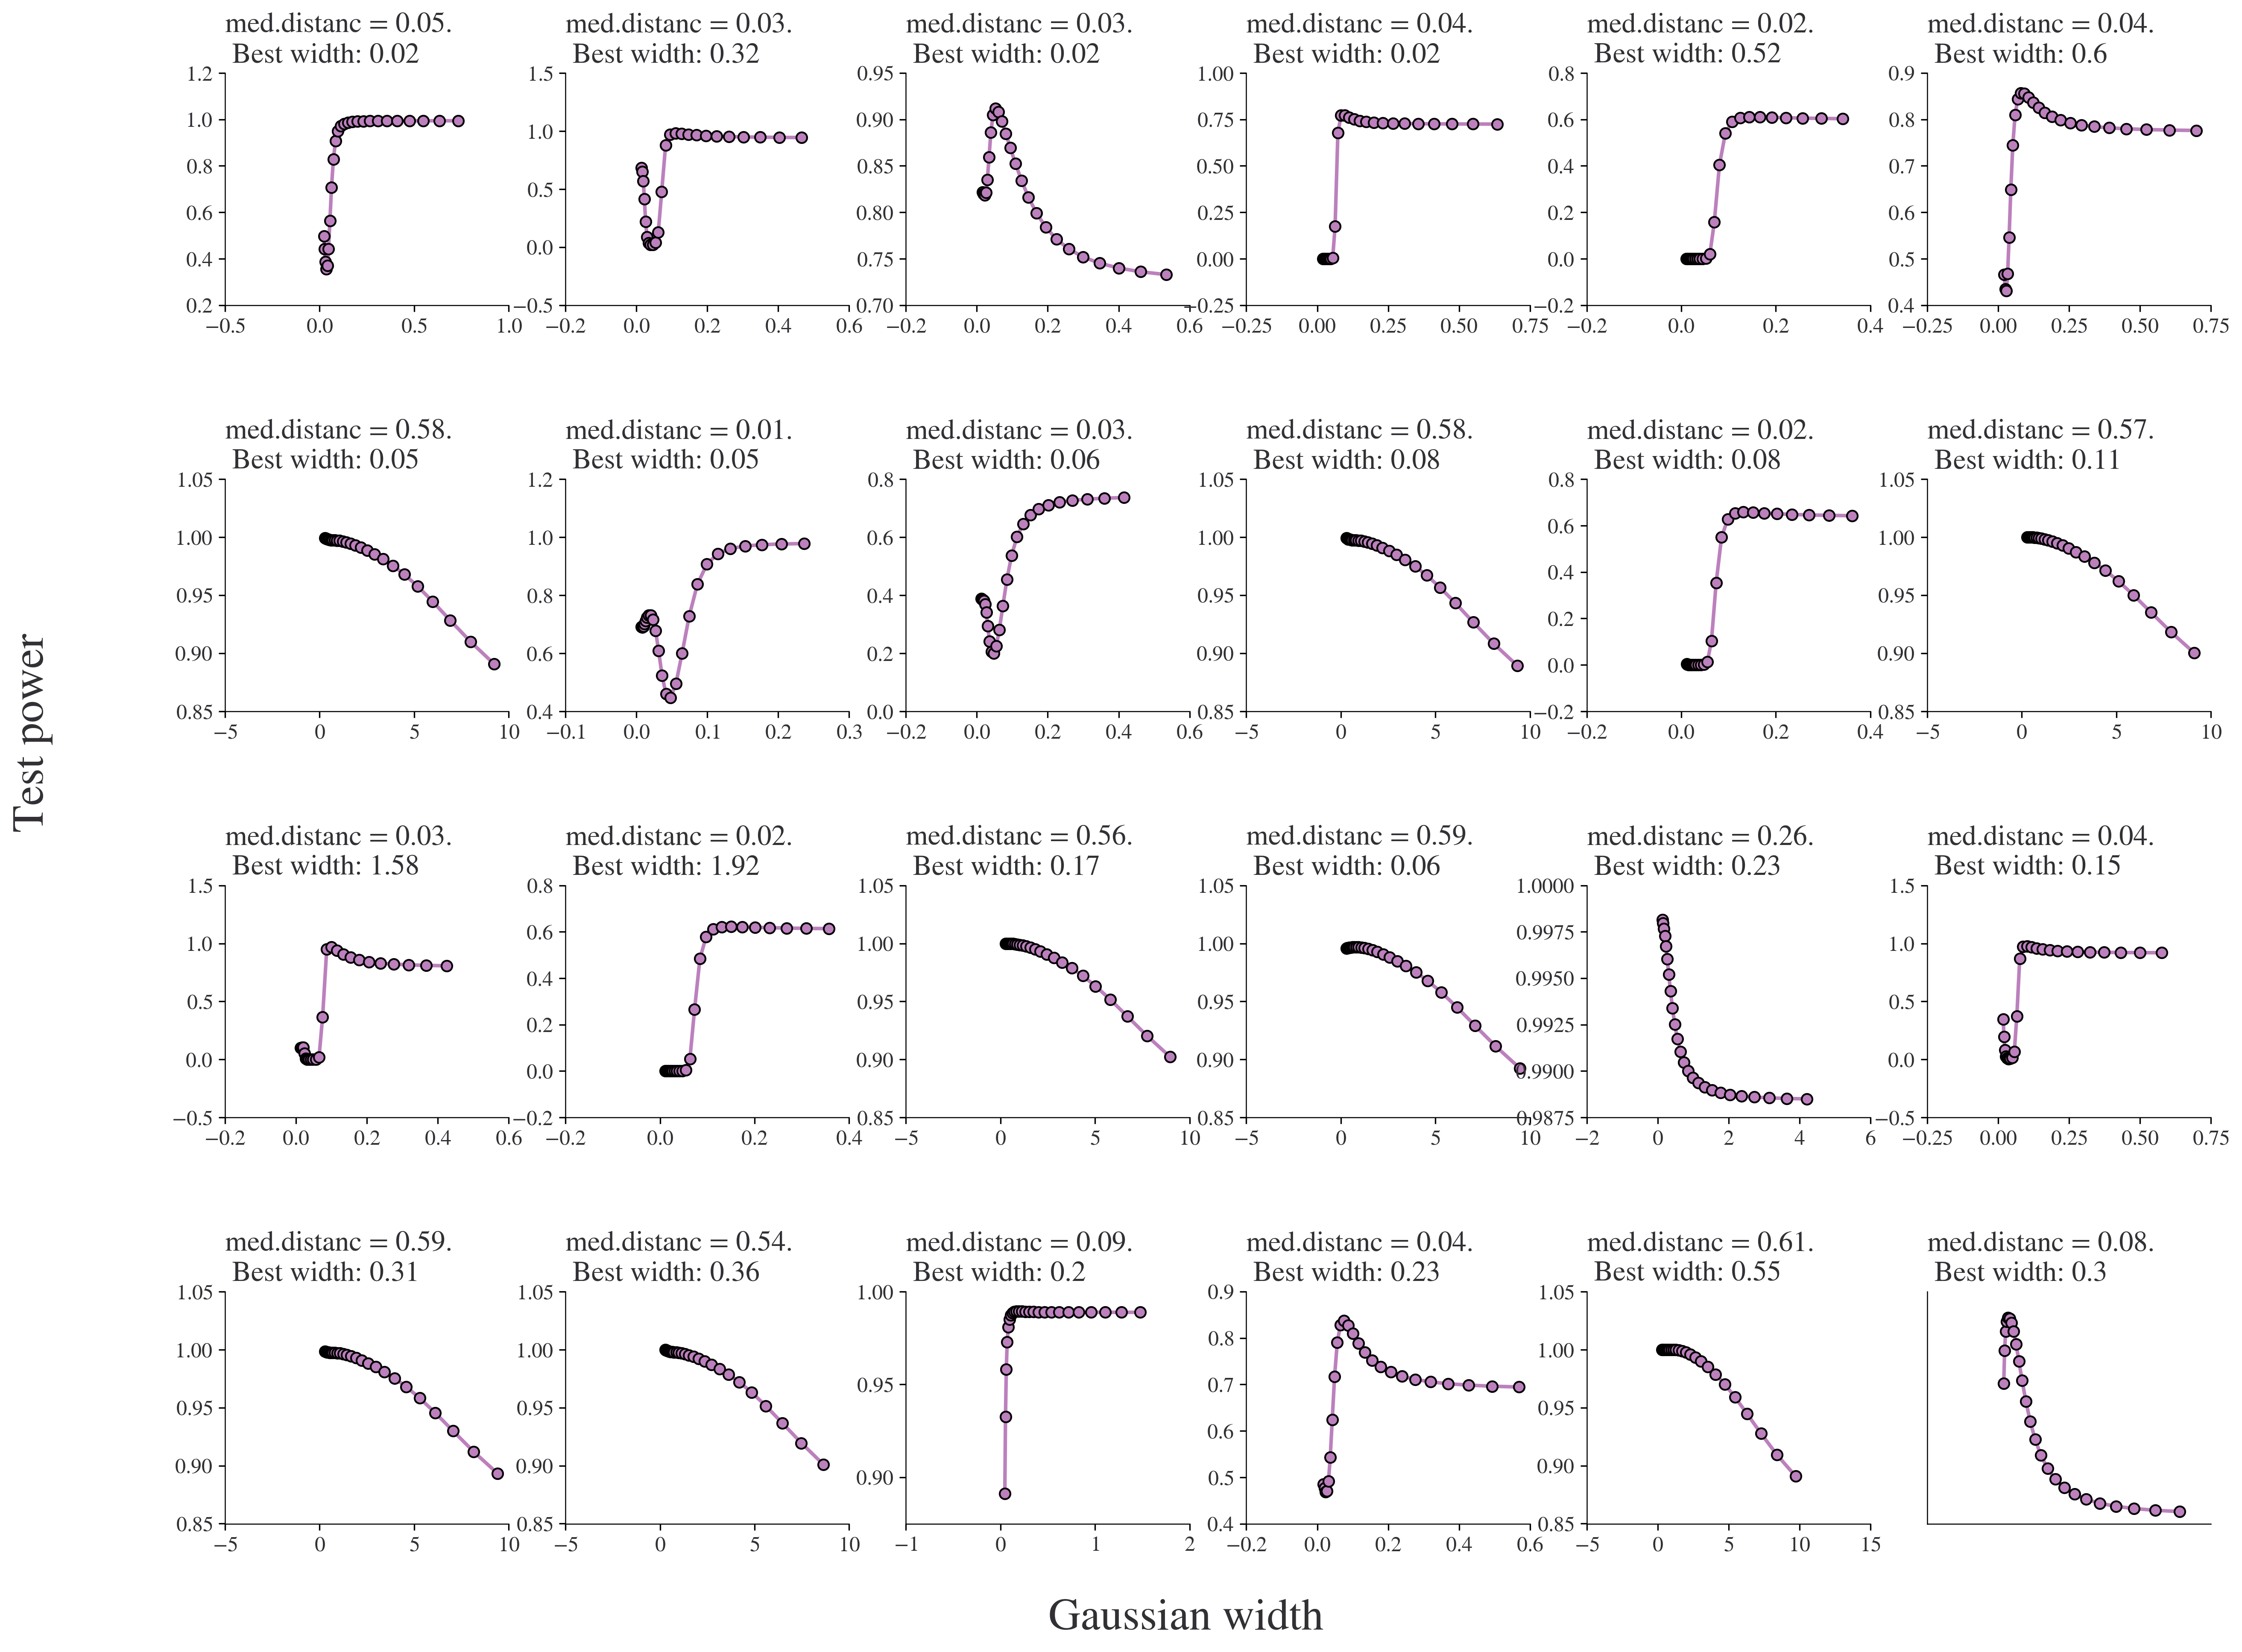

In [161]:
plt.figure(figsize=(20, 15))
# fig, axes = plt.subplots(5, 2, sharex=True, sharey=True, figsize=(6,15))
# add a big axis, hide frame
# fig.add_subplot(111, frameon=False)
plt.subplots_adjust(hspace=0.75)
for test_idx in range(0,24):
    ax = plt.subplot(4, 6, test_idx + 1)
    #ax.set_xlabel('Common x-label')
#     ax.set_ylabel('test power', fontsize= 20)


    ax.plot(widths_df[test_idx], powers_df[test_idx], 'o-')
#     plt.xlabel('Gaussian width')
#     plt.ylabel('test power')
    plt.title('med.distanc = %.3g. \n Best width: %.3g'%(round(med_df.iloc[test_idx].values[0],2), round(widths_df[besti_df.iloc[test_idx][0]][test_idx],2)) )

plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
_=plt.figtext(.05,.49,'Test power', fontsize=25, ha='center',rotation=90)
_=plt.figtext(.5,0.07,'Gaussian width',fontsize=25,ha='center')
title = symbol +'_kernel_width_test_power.png'
plt.savefig(os.path.join(figuresLocation,title))

In [149]:
print(title)

FB1_kernel_width_test_power.png


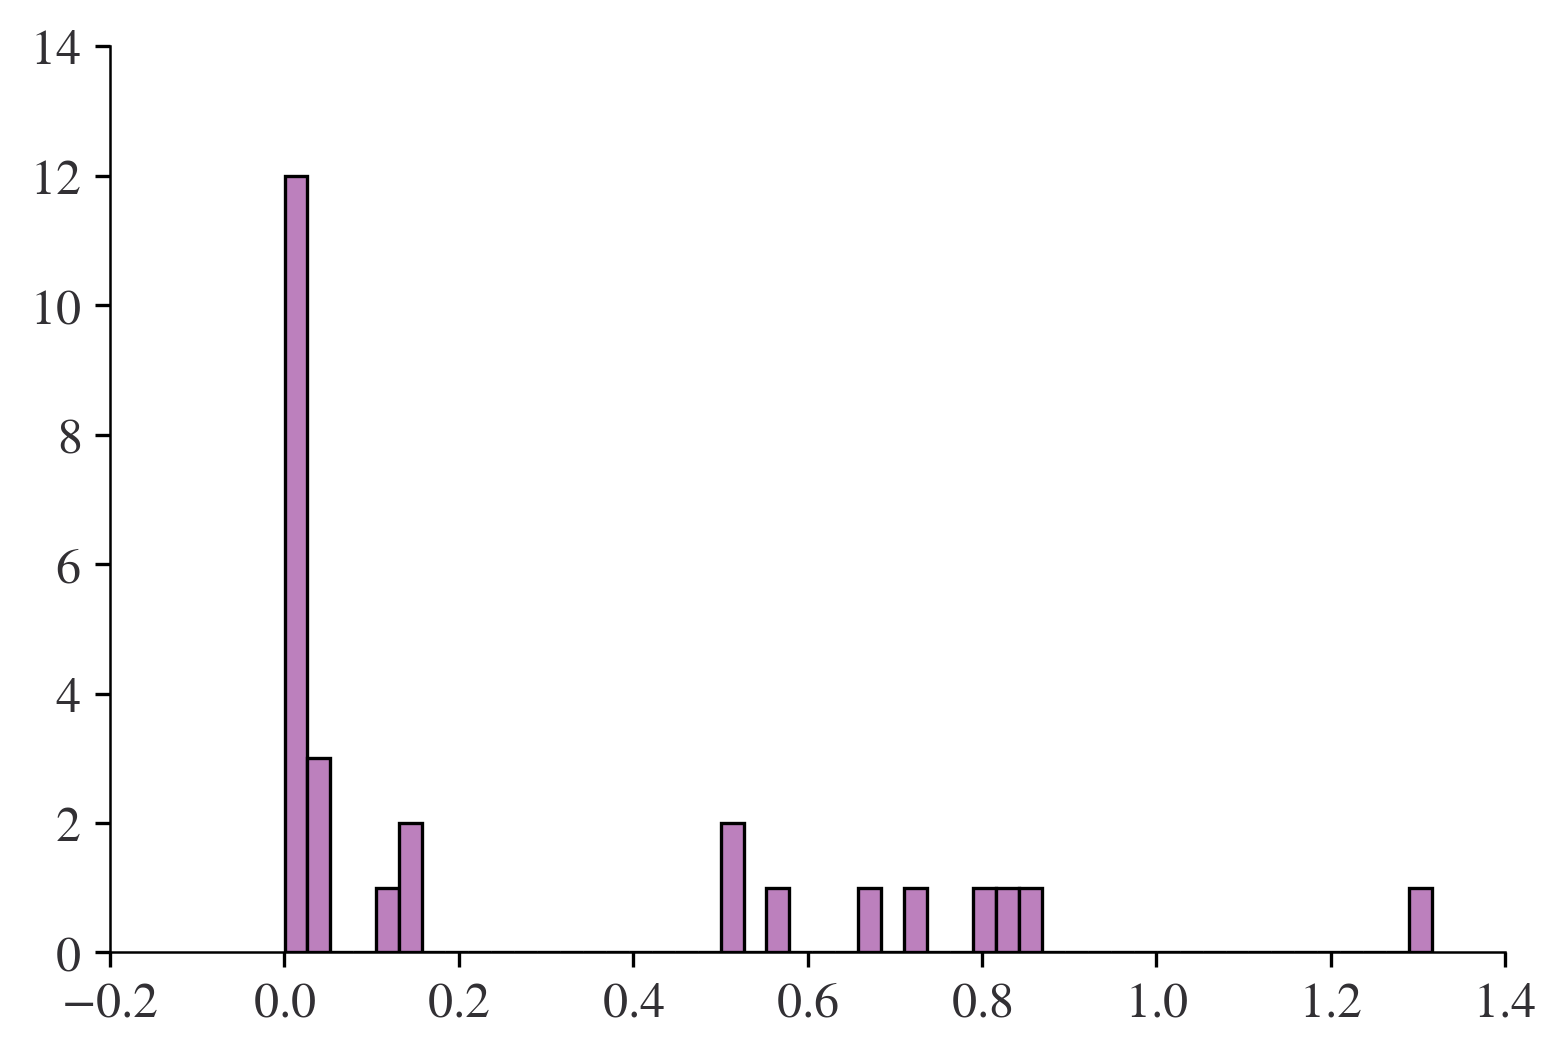

In [14]:
_=plt.hist(list(compute_lin_unb_est_dict.values()), bins=50)

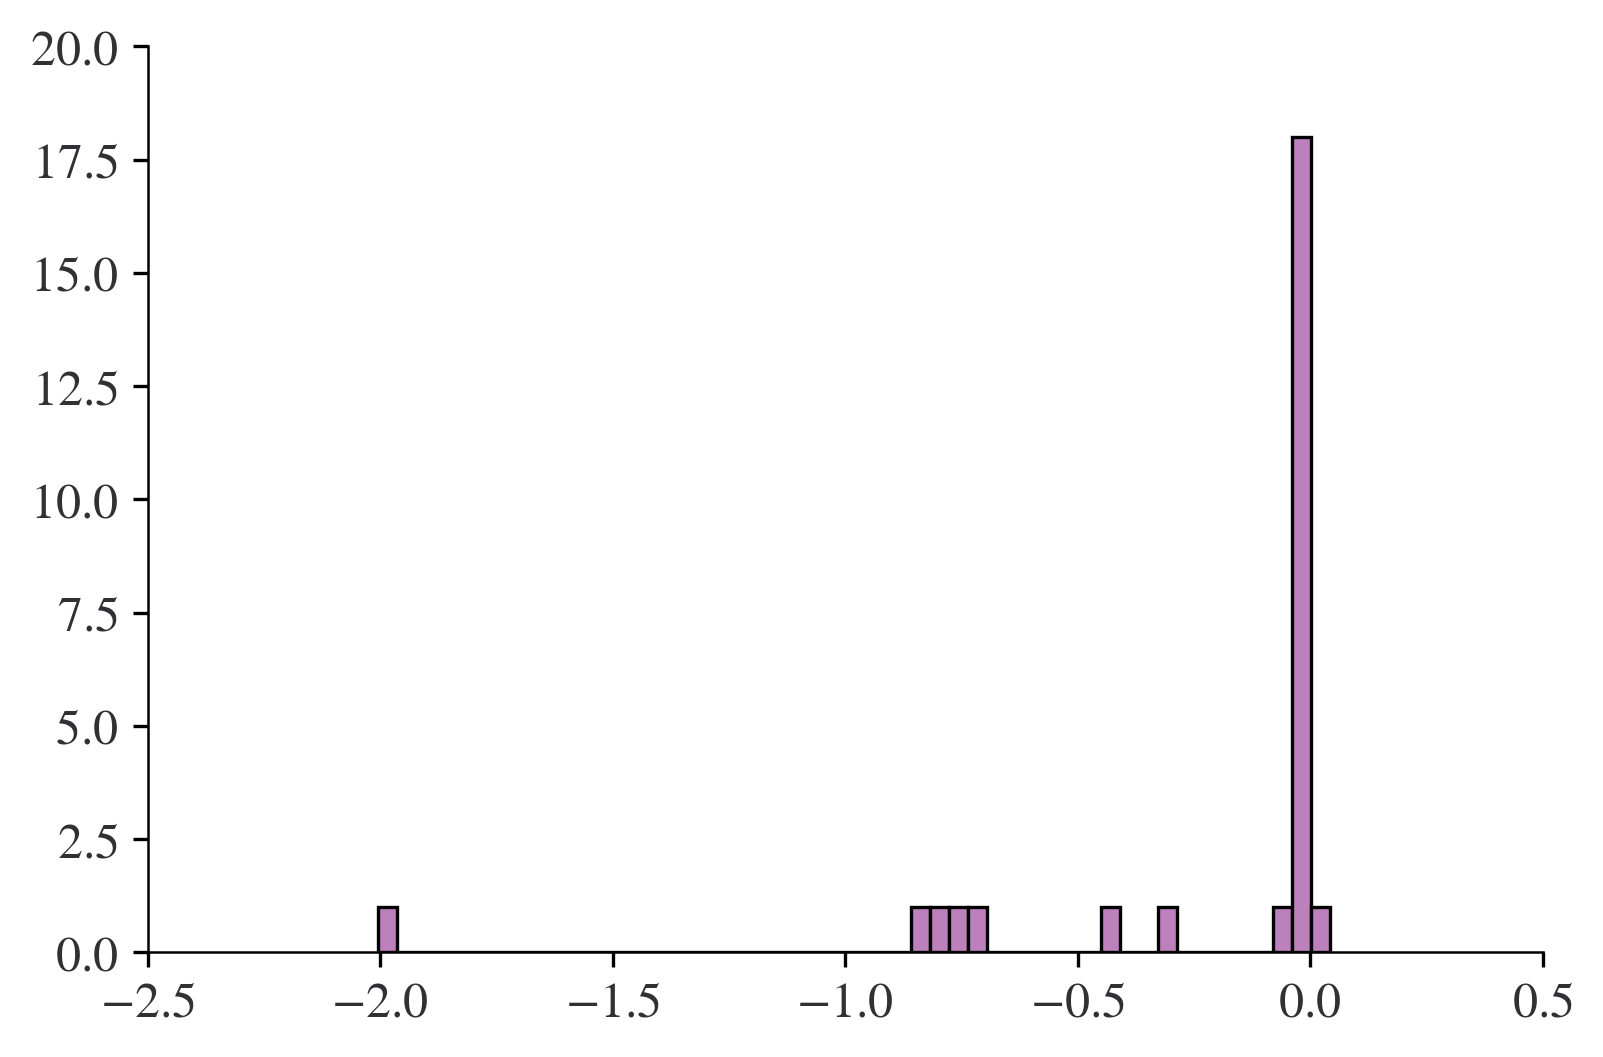

In [109]:
_=plt.hist(list(test_variance_dict.values()), bins=50)

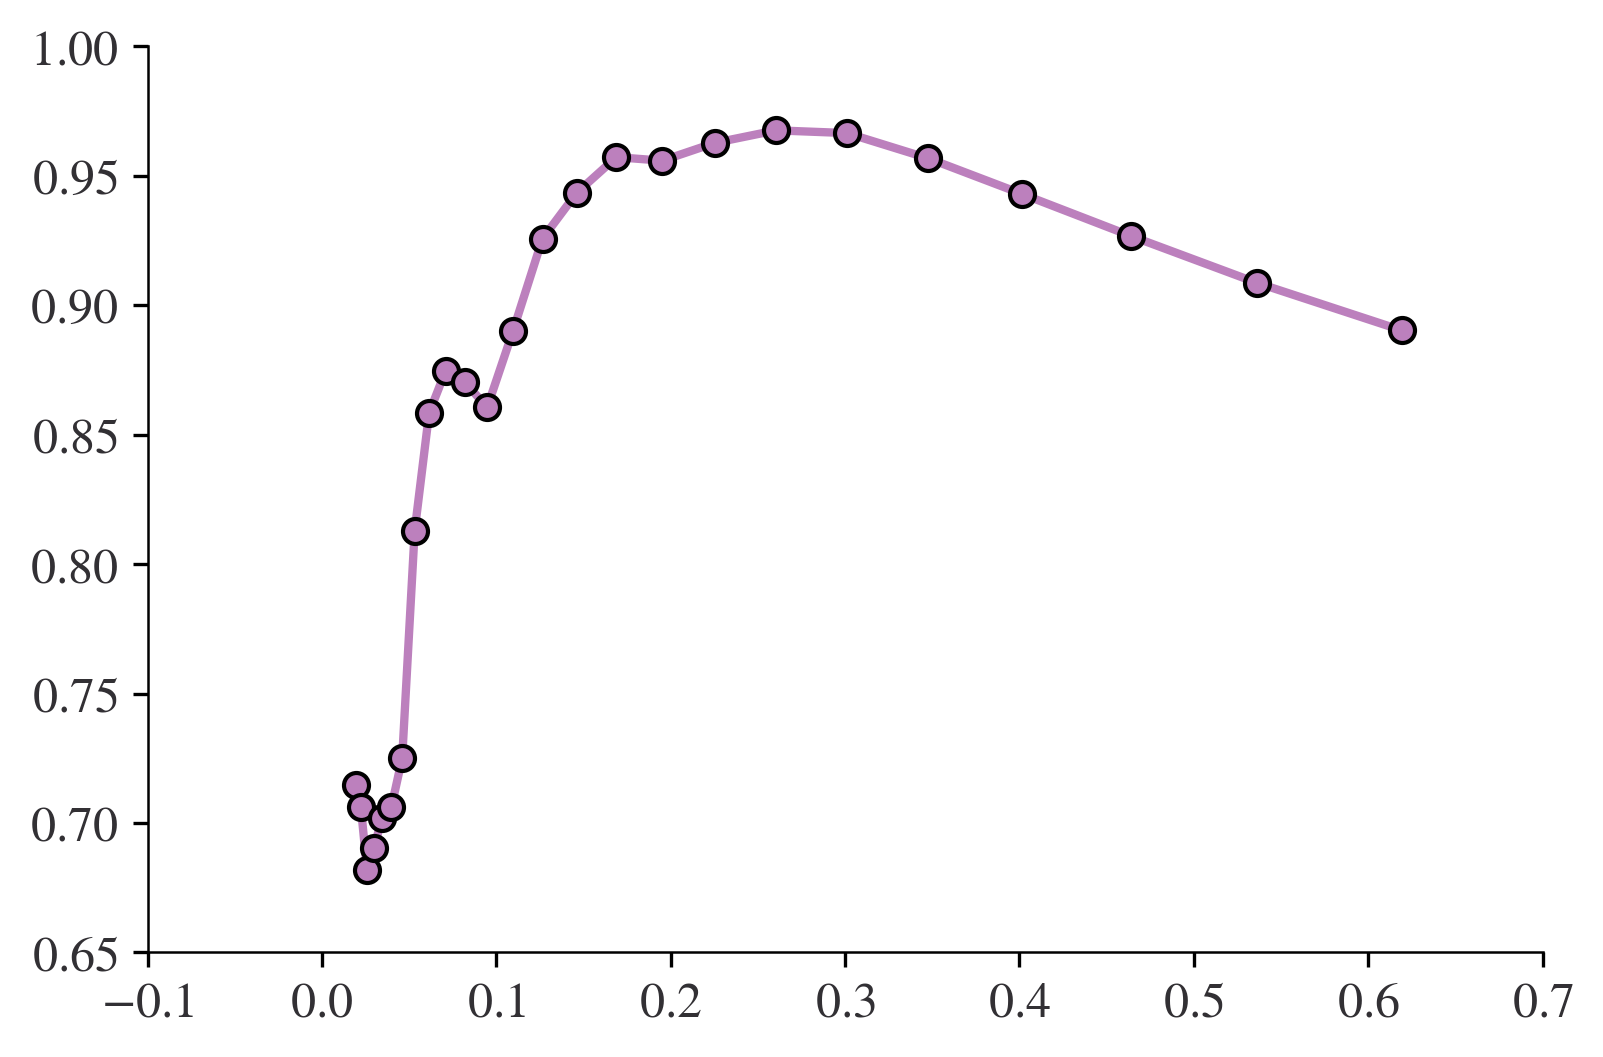

In [110]:
median_widths = widths_df.median(axis=1)
median_powers = powers_df.median(axis=1)
plt.plot(median_widths, median_powers, 'o-')

Text(0.0, 1.0, 'median distance = 0.0219. Best width: 0.127')

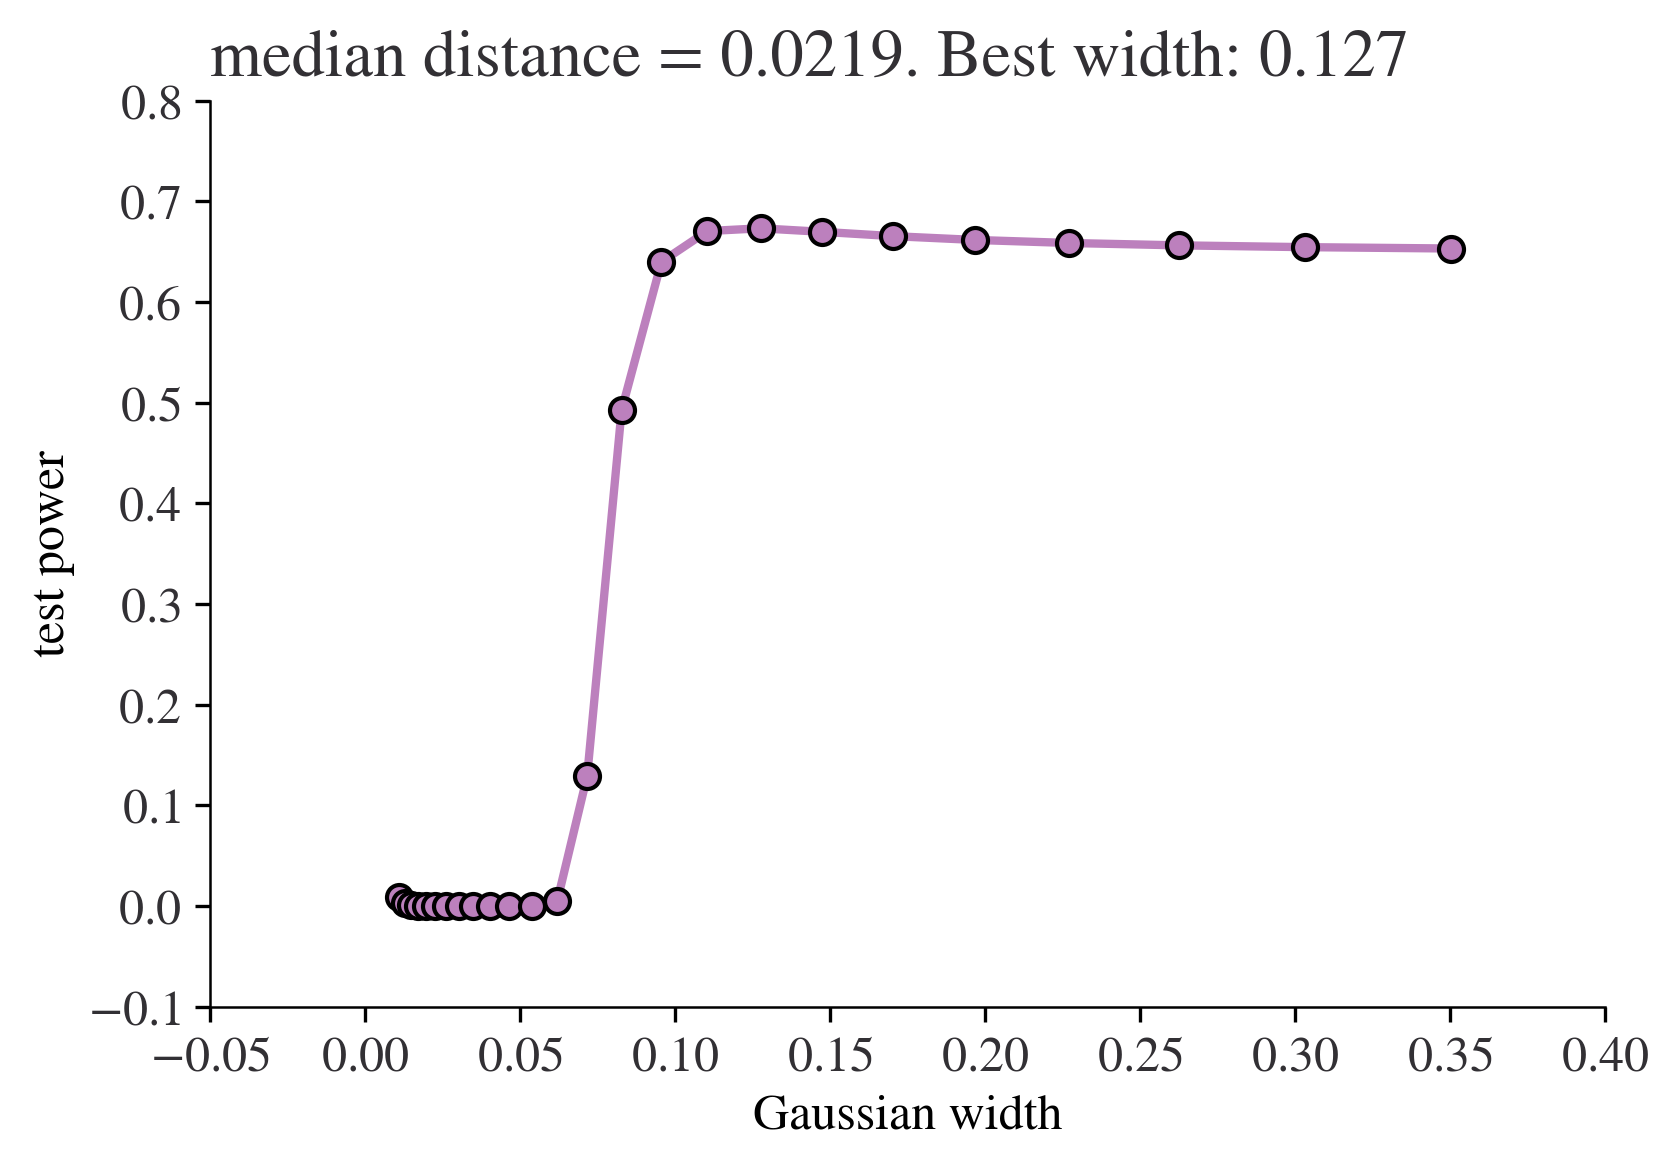

In [111]:
plt.plot(widths, powers, 'o-')
plt.xlabel('Gaussian width')
plt.ylabel('test power')
plt.title('median distance = %.3g. Best width: %.3g'%(med, widths[besti]) )

In [66]:
# The actual test 
best_ker = list_kernels[besti]
lin_mmd_test = tst.LinearMMDTest(best_ker, alpha)

file_dict[shifts[idxShift]]['test_result'][]

{'alpha': 0.01,
 'pvalue': 0.0001384083207138508,
 'test_stat': 0.00018484770237576776,
 'h0_rejected': True}

In [166]:
rx_files = [f for f in os.listdir(expOne) if str('RX1') in f]

In [167]:
file_loc = os.path.join(expOne, rx_files[0])

In [171]:
pd.read_pickle(file_loc)['dollar']['tau']

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, -0.94917973, -0.90504716, -0.86604682, -0.83151774,
       -0.80086999, -0.77353559, -0.74898334, -0.72673405, -0.70636937,
       -0.6875339 , -0.66993241, -0.65332378, -0.63751368, -0.62234692,
       -0.6077004 , -0.59347698, -0.57960018, -0.56600996, -0.55265925,
       -0.53951114, -0.52653675, -0.51371349, -0.50102367, -0.48845346,
       -0.47599207, -0.46363107, -0.45136385, -0.43918529, -0.42709137,
       -0.41507894, -0.40314555, -0.39128925, -0.37950849, -0.36780204,
       -0.35616887, -0.34460813, -0.33311908, -0.32170106, -0.31